In [1]:
import requests
import bs4 as bs
import urllib.request
import numpy as np # library to handle data in a vectorized manner
import pandas as pd # library for data analsysis
from bs4 import BeautifulSoup
import lxml
import html5lib

import os
import pandas as pd
import matplotlib.pyplot as plt

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 


import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

Libraries imported.


#### I am working on Toronto data coming from Wikipedia, where I will scrape from one file (https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M) the information related to Toronto neighbourhoods, postal codes and from another file (https://en.wikipedia.org/wiki/Demographics_of_Toronto_neighbourhoods ) I will scrape the demographic data for the neighbourhoods. Then I will use the foursquare information to find Toronto venues especially the restaurants to decide on the best location for a Chinese cousin restaurant based on selecting the neighbourhood with the largest Chinese speaking residents there.  

In [2]:
## Source URL for the neighbourhoods and postal codes
url = "https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M" 

# The first step is to scrape wikipedia page to extract HTML text script

#### I will use BeautifulSoup for scraping the page an extract the information

In [3]:
from lxml.html import fromstring
wikipedia_url = requests.get('https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M').text
soup=BeautifulSoup(wikipedia_url,'lxml')
print(soup.prettify())

<!DOCTYPE html>
<html class="client-nojs" dir="ltr" lang="en">
 <head>
  <meta charset="utf-8"/>
  <title>
   List of postal codes of Canada: M - Wikipedia
  </title>
  <script>
   document.documentElement.className=document.documentElement.className.replace(/(^|\s)client-nojs(\s|$)/,"$1client-js$2");RLCONF={"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":!1,"wgNamespaceNumber":0,"wgPageName":"List_of_postal_codes_of_Canada:_M","wgTitle":"List of postal codes of Canada: M","wgCurRevisionId":900271985,"wgRevisionId":900271985,"wgArticleId":539066,"wgIsArticle":!0,"wgIsRedirect":!1,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["Communications in Ontario","Postal codes in Canada","Toronto","Ontario-related lists"],"wgBreakFrames":!1,"wgPageContentLanguage":"en","wgPageContentModel":"wikitext","wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June",

In [4]:
def scrape_table_bs4(cname,cols):
    page = urllib.request.urlopen(url).read()
    soup = bs.BeautifulSoup(page,'lxml')
    table = soup.find("table",class_=cname)
    header = [head.findAll(text=True)[0].strip() for head in table.find_all("th")]
    data = [[td.findAll(text=True)[0].strip() for td in tr.find_all("td")]
    for tr in table.find_all("tr")]
    data = [row for row in data if len(row) == cols]
    # Store data to this temporary dataframe
    raw_df = pd.DataFrame(data,columns=header)
    return raw_df

#### Let us test in beautifulSoup

In [5]:
raw_TorontoPostalCodes = scrape_table_bs4("wikitable",3)

In [6]:
print("# Toronto Postal codes stored in data")
print(raw_TorontoPostalCodes.info(verbose=True))

# Toronto Postal codes stored in data
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 288 entries, 0 to 287
Data columns (total 3 columns):
Postcode         288 non-null object
Borough          288 non-null object
Neighbourhood    288 non-null object
dtypes: object(3)
memory usage: 6.8+ KB
None


#### Some boroughs have not assigned information. We need to deal with this situation.

In [7]:
TorontoPostalCodes=raw_TorontoPostalCodes[~raw_TorontoPostalCodes['Borough'].isin(['Not assigned'])]
# Sort and Reset index.
TorontoPostalCodes=TorontoPostalCodes.sort_values(by=['Postcode','Borough','Neighbourhood'], ascending=[1,1,1]).reset_index(drop=True)

## Only process the cells that have an assigned borough and ignore cells with a borough that is Not assigned.

In [8]:
TorontoPostalCodes

,Postcode,Borough,Neighbourhood
0,M1B,Scarborough,Malvern
1,M1B,Scarborough,Rouge
2,M1C,Scarborough,Highland Creek
3,M1C,Scarborough,Port Union
4,M1C,Scarborough,Rouge Hill
5,M1E,Scarborough,Guildwood
6,M1E,Scarborough,Morningside
7,M1E,Scarborough,West Hill
8,M1G,Scarborough,Woburn
9,M1H,Scarborough,Cedarbrae


In [9]:
TorontoPostalCodes['Postcode']
postcode = TorontoPostalCodes.filter(['Postcode'], axis=1)
#print(postcode.to_string(index=False))
postcode.Postcode.unique()

array(['M1B', 'M1C', 'M1E', 'M1G', 'M1H', 'M1J', 'M1K', 'M1L', 'M1M',
       'M1N', 'M1P', 'M1R', 'M1S', 'M1T', 'M1V', 'M1W', 'M1X', 'M2H',
       'M2J', 'M2K', 'M2L', 'M2M', 'M2N', 'M2P', 'M2R', 'M3A', 'M3B',
       'M3C', 'M3H', 'M3J', 'M3K', 'M3L', 'M3M', 'M3N', 'M4A', 'M4B',
       'M4C', 'M4E', 'M4G', 'M4H', 'M4J', 'M4K', 'M4L', 'M4M', 'M4N',
       'M4P', 'M4R', 'M4S', 'M4T', 'M4V', 'M4W', 'M4X', 'M4Y', 'M5A',
       'M5B', 'M5C', 'M5E', 'M5G', 'M5H', 'M5J', 'M5K', 'M5L', 'M5M',
       'M5N', 'M5P', 'M5R', 'M5S', 'M5T', 'M5V', 'M5W', 'M5X', 'M6A',
       'M6B', 'M6C', 'M6E', 'M6G', 'M6H', 'M6J', 'M6K', 'M6L', 'M6M',
       'M6N', 'M6P', 'M6R', 'M6S', 'M7A', 'M7R', 'M7Y', 'M8V', 'M8W',
       'M8X', 'M8Y', 'M8Z', 'M9A', 'M9B', 'M9C', 'M9L', 'M9M', 'M9N',
       'M9P', 'M9R', 'M9V', 'M9W'], dtype=object)

### If a cell has a borough but a Not assigned neighborhood, then the neighborhood will be the same as the borough. As an example the value of the Borough and the Neighborhood columns will be Queen's Park.

In [10]:
TorontoPostalCodes = TorontoPostalCodes.groupby(['Postcode','Borough'])['Neighbourhood'].apply(', '.join).reset_index()

In [11]:
TorontoPostalCodes.loc[TorontoPostalCodes['Neighbourhood'] == 'Not assigned', ['Neighbourhood']] = TorontoPostalCodes['Borough']
check_unassigned_post_state_sample = TorontoPostalCodes.loc[TorontoPostalCodes['Borough'] == 'Queen\'s Park']

In [12]:
TorontoPostalCodes.shape

(103, 3)

#### I will save the processed data for Toronto as a csv file and I will call it Toronto.Part_1_df.csv

In [13]:
TorontoPostalCodes.to_csv('Toronto.PART_1_df.csv',index=False)

### The coordinates of the Boroughs and the Neighborhoods are stored in a file called Geospatial_data and provided in the path shown belwo.

In [14]:
path='http://cocl.us/Geospatial_data'
Location_coordinates = pd.read_csv(path)

In [15]:
part1_data_csv = "Toronto.PART_1_df.csv"
TorontoPostalCodes = pd.read_csv(part1_data_csv).set_index("Postcode")
TorontoPostalCodes.rename_axis("Postal Code", axis='index', inplace=True)
TorontoPostalCodes.head()

,Borough,Neighbourhood
Postal Code,,
M1B,Scarborough,"Malvern, Rouge"
M1C,Scarborough,"Highland Creek, Port Union, Rouge Hill"
M1E,Scarborough,"Guildwood, Morningside, West Hill"
M1G,Scarborough,Woburn
M1H,Scarborough,Cedarbrae


#### We will now append the coordinates to the dataframe

In [16]:
toronto_geocsv = 'https://cocl.us/Geospatial_data'
!wget.exe -q -O 'toronto_m.geospatial_data.csv' toronto_geocsv
geocsv_data = pd.read_csv(toronto_geocsv).set_index("Postal Code")
geocsv_data.head()

,Latitude,Longitude
Postal Code,,
M1B,43.806686,-79.194353
M1C,43.784535,-79.160497
M1E,43.763573,-79.188711
M1G,43.770992,-79.216917
M1H,43.773136,-79.239476


In [17]:
toronto_neighborhoods = TorontoPostalCodes.join(geocsv_data)
toronto_neighborhoods.head()

,Borough,Neighbourhood,Latitude,Longitude
Postal Code,,,,
M1B,Scarborough,"Malvern, Rouge",43.806686,-79.194353
M1C,Scarborough,"Highland Creek, Port Union, Rouge Hill",43.784535,-79.160497
M1E,Scarborough,"Guildwood, Morningside, West Hill",43.763573,-79.188711
M1G,Scarborough,Woburn,43.770992,-79.216917
M1H,Scarborough,Cedarbrae,43.773136,-79.239476


### We will save the output as a csv file called Toronto.part2_df.csv

In [18]:
toronto_neighborhoods.to_csv('Toronto.PART2_df.csv',index=False)

In [19]:
toronto_neighborhoods.shape

(103, 4)

In [20]:
# Saved Toronto postal codes with borough and neighbors.
toronto_part1_csv = "Toronto.PART_1_df.csv"
# Saved Toronto postal codes with borough,neighbors,Longitude and Latitude.
toronto_part2_csv = "Toronto.PART2_df.csv"

In [21]:
toronto_neighborhoods = pd.read_csv(toronto_part2_csv)

#### The dataframe toronto_neighborhoods now has the coordinates as shwon below:

In [22]:
toronto_neighborhoods.shape
toronto_neighborhoods.head()

,Borough,Neighbourhood,Latitude,Longitude
0,Scarborough,"Malvern, Rouge",43.806686,-79.194353
1,Scarborough,"Highland Creek, Port Union, Rouge Hill",43.784535,-79.160497
2,Scarborough,"Guildwood, Morningside, West Hill",43.763573,-79.188711
3,Scarborough,Woburn,43.770992,-79.216917
4,Scarborough,Cedarbrae,43.773136,-79.239476


## Use the geopy library for getting Latitude and Longitude values of Toronto

In [23]:
address = 'Toronto, Ontario Canada'

geolocator = Nominatim()
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Toronto Canada are {}, {}.'.format(latitude, longitude))

C:\Users\gzoub\Anaconda3\lib\site-packages\geopy\geocoders\osm.py:143: UserWarning: Using Nominatim with the default "geopy/1.17.0" `user_agent` is strongly discouraged, as it violates Nominatim's ToS https://operations.osmfoundation.org/policies/nominatim/ and may possibly cause 403 and 429 HTTP errors. Please specify a custom `user_agent` with `Nominatim(user_agent="my-application")` or by overriding the default `user_agent`: `geopy.geocoders.options.default_user_agent = "my-application"`. In geopy 2.0 this will become an exception.
  UserWarning


The geograpical coordinate of Toronto Canada are 43.653963, -79.387207.


## Create a map of Toronto with neighborhoods superimposed on top

#### We will utilize the coordinates of the neighborhoods ceners to draw them on the map

In [24]:
# create map of New York using latitude and longitude values
map_toronto = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, borough, neighborhood in zip(toronto_neighborhoods['Latitude'], toronto_neighborhoods['Longitude'], toronto_neighborhoods['Borough'], toronto_neighborhoods['Neighbourhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=4,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#87cefa',
        fill_opacity=0.5,
        parse_html=False).add_to(map_toronto)
map_toronto

### Reduce the analysis to Neighbohoods which has Toronto at the end such as East,West and Central Toronto, by taking portion of the dataframe with Boroughs contain the word Toronto

In [25]:
toronto_data = toronto_neighborhoods[toronto_neighborhoods['Borough'].str.contains("Toronto")].reset_index(drop=True)
print(toronto_data.shape)
toronto_data.head()

(38, 4)


,Borough,Neighbourhood,Latitude,Longitude
0,East Toronto,The Beaches,43.676357,-79.293031
1,East Toronto,"Riverdale, The Danforth West",43.679557,-79.352188
2,East Toronto,"India Bazaar, The Beaches West",43.668999,-79.315572
3,East Toronto,Studio District,43.659526,-79.340923
4,Central Toronto,Lawrence Park,43.728020,-79.388790


### Let us creat a map with the new markers for the above Toronto Neighborhoods only 

In [26]:
map_toronto = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, label in zip(toronto_data['Latitude'], toronto_data['Longitude'], toronto_data['Neighbourhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_toronto)  
    
map_toronto

### Next, we are going to start utilizing the Foursquare API to explore the neighborhoods and segment them

In [27]:
CLIENT_ID = 'WYILL2Y40NIWAVSQDQYCHRGDDMJMGP1AZFKDL3RVZVP5QYZT' # your Foursquare ID
CLIENT_SECRET = 'KTPGRZVHSW1WJP5KS1WDNG3ZPGZ0HEKHUMLSUPHD1XBTKMHL' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: WYILL2Y40NIWAVSQDQYCHRGDDMJMGP1AZFKDL3RVZVP5QYZT
CLIENT_SECRET:KTPGRZVHSW1WJP5KS1WDNG3ZPGZ0HEKHUMLSUPHD1XBTKMHL


### Now we will find Toronto's Venues

In [28]:
def getNearbyVenues(names, latitudes, longitudes, radius=500, LIMIT = 100):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighbourhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [29]:
toronto_neighborhoods = toronto_data
toronto_venues = getNearbyVenues(names=toronto_neighborhoods['Neighbourhood'],
                                   latitudes=toronto_neighborhoods['Latitude'],
                                   longitudes=toronto_neighborhoods['Longitude'], 
                                  )

The Beaches
Riverdale, The Danforth West
India Bazaar, The Beaches West
Studio District
Lawrence Park
Davisville North
North Toronto West
Davisville
Moore Park, Summerhill East
Deer Park, Forest Hill SE, Rathnelly, South Hill, Summerhill West
Rosedale
Cabbagetown, St. James Town
Church and Wellesley
Harbourfront, Regent Park
Garden District, Ryerson
St. James Town
Berczy Park
Central Bay Street
Adelaide, King, Richmond
Harbourfront East, Toronto Islands, Union Station
Design Exchange, Toronto Dominion Centre
Commerce Court, Victoria Hotel
Roselawn
Forest Hill North, Forest Hill West
North Midtown, The Annex, Yorkville
Harbord, University of Toronto
Chinatown, Grange Park, Kensington Market
Bathurst Quay, CN Tower, Harbourfront West, Island airport, King and Spadina, Railway Lands, South Niagara
Stn A PO Boxes 25 The Esplanade
First Canadian Place, Underground city
Christie
Dovercourt Village, Dufferin
Little Portugal, Trinity
Brockton, Exhibition Place, Parkdale Village
High Park, The 

#### Inspecting the The Dataframe size

In [30]:
print(toronto_venues.shape)
toronto_venues.head()

(1708, 7)


,Neighbourhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,The Beaches,43.676357,-79.293031,Glen Manor Ravine,43.676821,-79.293942,Trail
1,The Beaches,43.676357,-79.293031,The Big Carrot Natural Food Market,43.678879,-79.297734,Health Food Store
2,The Beaches,43.676357,-79.293031,Grover Pub and Grub,43.679181,-79.297215,Pub
3,The Beaches,43.676357,-79.293031,Glen Stewart Ravine,43.676300,-79.294784,Other Great Outdoors
4,The Beaches,43.676357,-79.293031,Upper Beaches,43.680563,-79.292869,Neighborhood


### Let us count the venues which were returned for each Borough¶

In [31]:
toronto_venues.groupby('Neighbourhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighbourhood,,,,,,
"Adelaide, King, Richmond",100,100,100,100,100,100
"Bathurst Quay, CN Tower, Harbourfront West, Island airport, King and Spadina, Railway Lands, South Niagara",17,17,17,17,17,17
Berczy Park,58,58,58,58,58,58
"Brockton, Exhibition Place, Parkdale Village",21,21,21,21,21,21
Business Reply Mail Processing Centre 969 Eastern,19,19,19,19,19,19
"Cabbagetown, St. James Town",43,43,43,43,43,43
Central Bay Street,85,85,85,85,85,85
"Chinatown, Grange Park, Kensington Market",100,100,100,100,100,100
Christie,16,16,16,16,16,16


### Let's find out how many unique categories in all the returned venues

In [32]:
print('There are {} uniques categories.'.format(len(toronto_venues['Venue Category'].unique())))

There are 239 uniques categories.


### Let us analyze Each Neighborhood

In [33]:
# one hot encoding
toronto_onehot = pd.get_dummies(toronto_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
toronto_onehot['Neighbourhood'] = toronto_venues['Neighbourhood'] 

# move neighborhood column to the first column
fixed_columns = [toronto_onehot.columns[-1]] + list(toronto_onehot.columns[:-1])
toronto_onehot = toronto_onehot[fixed_columns]

toronto_onehot.head()

,Neighbourhood,Afghan Restaurant,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,Aquarium,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Workshop,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Baseball Stadium,Basketball Stadium,Beach,Beer Bar,Beer Store,Belgian Restaurant,Bistro,Board Shop,Boat or Ferry,Bookstore,Boutique,Bowling Alley,Brazilian Restaurant,Breakfast Spot,Brewery,Bubble Tea Shop,Building,Burger Joint,Burrito Place,Bus Line,Bus Stop,Butcher,Café,Cajun / Creole Restaurant,Camera Store,Caribbean Restaurant,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Arts Building,College Gym,College Rec Center,Colombian Restaurant,Comfort Food Restaurant,Comic Shop,Concert Hall,Convenience Store,Cosmetics Shop,Coworking Space,Creperie,Cuban Restaurant,Cupcake Shop,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Dive Bar,Dog Run,Doner Restaurant,Donut Shop,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Ethiopian Restaurant,Event Space,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Filipino Restaurant,Fish & Chips Shop,Fish Market,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gastropub,Gay Bar,General Entertainment,General Travel,Gift Shop,Gluten-free Restaurant,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Harbor / Marina,Health & Beauty Service,Health Food Store,Historic Site,History Museum,Hobby Shop,Home Service,Hookah Bar,Hospital,Hostel,Hotel,Hotel Bar,Hotpot Restaurant,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Intersection,Irish Pub,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Jewish Restaurant,Juice Bar,Korean Restaurant,Lake,Latin American Restaurant,Light Rail Station,Lingerie Store,Liquor Store,Lounge,Mac & Cheese Joint,Malay Restaurant,Market,Martial Arts Dojo,Mediterranean Restaurant,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Modern European Restaurant,Molecular Gastronomy Restaurant,Monument / Landmark,Movie Theater,Moving Target,Museum,Music Store,Music Venue,Neighborhood,New American Restaurant,Nightclub,Noodle House,Office,Opera House,Optical Shop,Organic Grocery,Other Great Outdoors,Outdoor Sculpture,Park,Performing Arts Venue,Pet Store,Pharmacy,Pizza Place,Plane,Playground,Plaza,Poke Place,Pool,Portuguese Restaurant,Poutine Place,Pub,Ramen Restaurant,Record Shop,Recording Studio,Restaurant,Roof Deck,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,Sculpture Garden,Seafood Restaurant,Shoe Store,Shopping Mall,Skate Park,Skating Rink,Smoke Shop,Smoothie Shop,Snack Place,Soup Place,Southern / Soul Food Restaurant,Spa,Speakeasy,Sporting Goods Shop,Sports Bar,Stadium,Stationery Store,Steakhouse,Strip Club,Supermarket,Supplement Shop,Sushi Restaurant,Swim School,Taco Place,Tailor Shop,Taiwanese Restaurant,Tanning Salon,Tapas Restaurant,Tea Room,Thai Restaurant,Theater,Theme Restaurant,Thrift / Vintage Store,Toy / Game Store,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Wine Bar,Wings Joint,Yoga Studio
0,The Beaches,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,The Beaches,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

### And let's examine the new dataframe size.

In [34]:
toronto_onehot.shape

(1708, 240)

### Next, let's group rows by neighborhood and by taking the mean of the frequency of occurrence of each category

In [35]:
toronto_grouped = toronto_onehot.groupby('Neighbourhood').mean().reset_index()
toronto_grouped

,Neighbourhood,Afghan Restaurant,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,Aquarium,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Workshop,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Baseball Stadium,Basketball Stadium,Beach,Beer Bar,Beer Store,Belgian Restaurant,Bistro,Board Shop,Boat or Ferry,Bookstore,Boutique,Bowling Alley,Brazilian Restaurant,Breakfast Spot,Brewery,Bubble Tea Shop,Building,Burger Joint,Burrito Place,Bus Line,Bus Stop,Butcher,Café,Cajun / Creole Restaurant,Camera Store,Caribbean Restaurant,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Arts Building,College Gym,College Rec Center,Colombian Restaurant,Comfort Food Restaurant,Comic Shop,Concert Hall,Convenience Store,Cosmetics Shop,Coworking Space,Creperie,Cuban Restaurant,Cupcake Shop,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Dive Bar,Dog Run,Doner Restaurant,Donut Shop,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Ethiopian Restaurant,Event Space,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Filipino Restaurant,Fish & Chips Shop,Fish Market,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gastropub,Gay Bar,General Entertainment,General Travel,Gift Shop,Gluten-free Restaurant,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Harbor / Marina,Health & Beauty Service,Health Food Store,Historic Site,History Museum,Hobby Shop,Home Service,Hookah Bar,Hospital,Hostel,Hotel,Hotel Bar,Hotpot Restaurant,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Intersection,Irish Pub,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Jewish Restaurant,Juice Bar,Korean Restaurant,Lake,Latin American Restaurant,Light Rail Station,Lingerie Store,Liquor Store,Lounge,Mac & Cheese Joint,Malay Restaurant,Market,Martial Arts Dojo,Mediterranean Restaurant,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Modern European Restaurant,Molecular Gastronomy Restaurant,Monument / Landmark,Movie Theater,Moving Target,Museum,Music Store,Music Venue,Neighborhood,New American Restaurant,Nightclub,Noodle House,Office,Opera House,Optical Shop,Organic Grocery,Other Great Outdoors,Outdoor Sculpture,Park,Performing Arts Venue,Pet Store,Pharmacy,Pizza Place,Plane,Playground,Plaza,Poke Place,Pool,Portuguese Restaurant,Poutine Place,Pub,Ramen Restaurant,Record Shop,Recording Studio,Restaurant,Roof Deck,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,Sculpture Garden,Seafood Restaurant,Shoe Store,Shopping Mall,Skate Park,Skating Rink,Smoke Shop,Smoothie Shop,Snack Place,Soup Place,Southern / Soul Food Restaurant,Spa,Speakeasy,Sporting Goods Shop,Sports Bar,Stadium,Stationery Store,Steakhouse,Strip Club,Supermarket,Supplement Shop,Sushi Restaurant,Swim School,Taco Place,Tailor Shop,Taiwanese Restaurant,Tanning Salon,Tapas Restaurant,Tea Room,Thai Restaurant,Theater,Theme Restaurant,Thrift / Vintage Store,Toy / Game Store,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Wine Bar,Wings Joint,Yoga Studio
0,"Adelaide, King, Richmond",0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.040000,0.000000,0.00,0.010000,0.010000,0.000000,0.030000,0.0000,0.000000,0.000000,0.0000,0.000000,0.030000,0.000000,0.040000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.010000,0.000000,0.000000,0.010000,0.020000,0.000000,0.000000,0.00,0.030000,0.010000,0.000000,0.000000,0.000000,0.050000,0.000000,0.00,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.070000,0.000000,0.000000,0.00,0.01,0.000000,0.000000,0.020000,0.000000,0.030000,0.

### Let's confirm the new size

In [36]:
toronto_grouped.shape

(38, 240)

### Let's print each neighborhood along with the top 5 most common venues

In [37]:
num_top_venues = 5
for neigh in toronto_grouped['Neighbourhood']:
    temp = toronto_grouped[toronto_grouped['Neighbourhood'] == neigh].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

                 venue  freq
0          Coffee Shop  0.07
1                 Café  0.05
2           Steakhouse  0.04
3                  Bar  0.04
4  American Restaurant  0.04


              venue  freq
0   Airport Service  0.18
1    Airport Lounge  0.12
2  Airport Terminal  0.12
3             Plane  0.06
4           Airport  0.06


          venue  freq
0   Coffee Shop  0.09
1  Cocktail Bar  0.05
2   Cheese Shop  0.03
3      Beer Bar  0.03
4    Steakhouse  0.03


            venue  freq
0  Breakfast Spot  0.10
1     Coffee Shop  0.10
2            Café  0.10
3     Yoga Studio  0.05
4             Gym  0.05


                venue  freq
0  Light Rail Station  0.11
1             Brewery  0.05
2          Skate Park  0.05
3       Garden Center  0.05
4       Moving Target  0.05


                venue  freq
0         Coffee Shop  0.07
1                Café  0.05
2  Italian Restaurant  0.05
3                 Pub  0.05
4                Park  0.05


                venue  freq
0         Coffee S

### Now let us sort the venues in descending order.

In [38]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [39]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighbourhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighbourhood'] = toronto_grouped['Neighbourhood']

for ind in np.arange(toronto_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(toronto_grouped.iloc[ind, :], num_top_venues)
neighborhoods_venues_sorted.shape

(38, 11)

### Cluster Neighborhoods: Run k-means to cluster the neighborhood into 10 clusters.

In [40]:
# set number of clusters
kclusters = 10

toronto_grouped_clustering = toronto_grouped.drop('Neighbourhood', 1)
# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=1).fit(toronto_grouped_clustering)

# check cluster labels generated for each row in the dataframe
print(kmeans.labels_[0:10])
print(len(kmeans.labels_))

[1 6 1 1 9 1 1 1 1 1]
38


In [41]:
toronto_neighborhoods.head()

,Borough,Neighbourhood,Latitude,Longitude
0,East Toronto,The Beaches,43.676357,-79.293031
1,East Toronto,"Riverdale, The Danforth West",43.679557,-79.352188
2,East Toronto,"India Bazaar, The Beaches West",43.668999,-79.315572
3,East Toronto,Studio District,43.659526,-79.340923
4,Central Toronto,Lawrence Park,43.728020,-79.388790


### Based on ranking the top most common venues in each neighbourhood we can inspect the results and check the results later with the neighbourhoods with the concentration of residents whem their second language is chinese. This will be the neighbourhood with the potential to open a new chinese cousin resturant. 

In [42]:
toronto_merged = toronto_neighborhoods

# add clustering labels
toronto_merged['Cluster Labels'] = kmeans.labels_

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
toronto_merged = toronto_merged.join(neighborhoods_venues_sorted.set_index('Neighbourhood'), on='Neighbourhood')

toronto_merged.head() # check the last columns!

,Borough,Neighbourhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,East Toronto,The Beaches,43.676357,-79.293031,1,Health Food Store,Neighborhood,Other Great Outdoors,Trail,Pub,Yoga Studio,Doner Restaurant,Discount Store,Dive Bar,Dog Run
1,East Toronto,"Riverdale, The Danforth West",43.679557,-79.352188,6,Greek Restaurant,Coffee Shop,Italian Restaurant,Ice Cream Shop,Furniture / Home Store,Bubble Tea Shop,Sports Bar,Spa,Juice Bar,Bookstore
2,East Toronto,"India Bazaar, The Beaches West",43.668999,-79.315572,1,Pet Store,Sushi Restaurant,Board Shop,Brewery,Burger Joint,Sandwich Place,Burrito Place,Pub,Pizza Place,Coffee Shop
3,East Toronto,Studio District,43.659526,-79.340923,1,Café,Coffee Shop,Italian Restaurant,Bakery,Music Store,American Restaurant,Gastropub,Cheese Shop,Fish Market,Bookstore
4,Central Toronto,Lawrence Park,43.728020,-79.388790,9,Park,Swim School,Bus Line,Yoga Studio,Diner,Falafel Restaurant,Event Space,Ethiopian Restaurant,Electronics Store,Eastern European Restaurant


### Finally, let's visualize the resulting clusters

In [43]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i+x+(i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(toronto_merged['Latitude'], toronto_merged['Longitude'], toronto_merged['Neighbourhood'],kmeans.labels_):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

## We want to utilize the demographic data for Toronto in order to decide in which neighbourhood we should open our restaurant. We would like to open a Chinese cousin restaurant, so we need to consider several factors, such as the concentration of Chinese descendants, the existence of other Chinese cousin restaurants in the neighbourhood before selecting the neighbourhood.

### The following wikipedia path contains the demographic data for Toronto (https://en.wikipedia.org/wiki/Demographics_of_Toronto_neighbourhoods)

#### The following url contains the Demographic data for Toronto 

In [44]:
## Source URL
url = "https://en.wikipedia.org/wiki/Demographics_of_Toronto_neighbourhoods"

#### We will have to scrape the data as we done for the neighbourhoods utiizing BeatifulSoup

#### We will scrape the data utilizing BeautifulSoup.

In [45]:
from lxml.html import fromstring
wikipedia_url = requests.get('https://en.wikipedia.org/wiki/Demographics_of_Toronto_neighbourhoods').text
soup=BeautifulSoup(wikipedia_url,'lxml')
print(soup.prettify())

<!DOCTYPE html>
<html class="client-nojs" dir="ltr" lang="en">
 <head>
  <meta charset="utf-8"/>
  <title>
   Demographics of Toronto neighbourhoods - Wikipedia
  </title>
  <script>
   document.documentElement.className=document.documentElement.className.replace(/(^|\s)client-nojs(\s|$)/,"$1client-js$2");RLCONF={"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":!1,"wgNamespaceNumber":0,"wgPageName":"Demographics_of_Toronto_neighbourhoods","wgTitle":"Demographics of Toronto neighbourhoods","wgCurRevisionId":810941245,"wgRevisionId":810941245,"wgArticleId":38958143,"wgIsArticle":!0,"wgIsRedirect":!1,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["Articles with obsolete information from April 2013","All Wikipedia articles in need of updating","Neighbourhoods in Toronto"],"wgBreakFrames":!1,"wgPageContentLanguage":"en","wgPageContentModel":"wikitext","wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames

In [46]:
def scrape_table_bs4(cname,cols):
    page = urllib.request.urlopen(url).read()
    soup = bs.BeautifulSoup(page,'lxml')
    table = soup.find("table",class_=cname)
    header = [head.findAll(text=True)[0].strip() for head in table.find_all("th")]
    data = [[td.findAll(text=True)[0].strip() for td in tr.find_all("td")]
    for tr in table.find_all("tr")]
    data = [row for row in data if len(row) == cols]
    # Store data to this temporary dataframe
    raw_df = pd.DataFrame(data,columns=header)
    return raw_df

In [47]:
df = scrape_table_bs4("wikitable",13)

### We will now examine the data and try to understand it so we can do the needed analysis for this project.

#### First we need to understand What is the type of the scrapped data:

In [48]:
print("# Toronto Demographics stored in data")
print(df.info(verbose=True))

# Toronto Demographics stored in data
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175 entries, 0 to 174
Data columns (total 13 columns):
Name                                                         175 non-null object
FM                                                           175 non-null object
Census Tracts                                                175 non-null object
Population                                                   175 non-null object
Land area (km2)                                              175 non-null object
Density (people/km2)                                         175 non-null object
% Change in Population since 2001                            175 non-null object
Average Income                                               175 non-null object
Transit Commuting %                                          175 non-null object
% Renters                                                    175 non-null object
Second most common language (after English) by 

In [49]:
df.dtypes

Name                                                         object
FM                                                           object
Census Tracts                                                object
Population                                                   object
Land area (km2)                                              object
Density (people/km2)                                         object
% Change in Population since 2001                            object
Average Income                                               object
Transit Commuting %                                          object
% Renters                                                    object
Second most common language (after English) by name          object
Second most common language (after English) by percentage    object
Map                                                          object
dtype: object

#### As we can see all of the data type is of an object type, which is not correct and this should be corrected before we can work with the data.

# Identify and handle missing values

# Evaluating for Missing Data

In [50]:
missing_data = df.isnull()
missing_data.head(5)

,Name,FM,Census Tracts,Population,Land area (km2),Density (people/km2),% Change in Population since 2001,Average Income,Transit Commuting %,% Renters,Second most common language (after English) by name,Second most common language (after English) by percentage,Map
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False


In [51]:
#Let us see the last 5 raws
missing_data = df.isnull()
missing_data.tail()

,Name,FM,Census Tracts,Population,Land area (km2),Density (people/km2),% Change in Population since 2001,Average Income,Transit Commuting %,% Renters,Second most common language (after English) by name,Second most common language (after English) by percentage,Map
170,False,False,False,False,False,False,False,False,False,False,False,False,False
171,False,False,False,False,False,False,False,False,False,False,False,False,False
172,False,False,False,False,False,False,False,False,False,False,False,False,False
173,False,False,False,False,False,False,False,False,False,False,False,False,False
174,False,False,False,False,False,False,False,False,False,False,False,False,False


#### It is clear that we don not have missing values

## Count missing values in each column

In [52]:
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")   

Name
False    175
Name: Name, dtype: int64

FM
False    175
Name: FM, dtype: int64

Census Tracts
False    175
Name: Census Tracts, dtype: int64

Population
False    175
Name: Population, dtype: int64

Land area (km2)
False    175
Name: Land area (km2), dtype: int64

Density (people/km2)
False    175
Name: Density (people/km2), dtype: int64

% Change in Population since 2001
False    175
Name: % Change in Population since 2001, dtype: int64

Average Income
False    175
Name: Average Income, dtype: int64

Transit Commuting %
False    175
Name: Transit Commuting %, dtype: int64

% Renters
False    175
Name: % Renters, dtype: int64

Second most common language (after English) by name
False    175
Name: Second most common language (after English) by name, dtype: int64

Second most common language (after English) by percentage
False    175
Name: Second most common language (after English) by percentage, dtype: int64

Map
False    175
Name: Map, dtype: int64



### As we can see there are no missing valuses.

In [53]:
df.head(50)

,Name,FM,Census Tracts,Population,Land area (km2),Density (people/km2),% Change in Population since 2001,Average Income,Transit Commuting %,% Renters,Second most common language (after English) by name,Second most common language (after English) by percentage,Map
0,Toronto,,All,"5,113,149",5903.63,866,9.0,"40,704",10.6,11.4,,,
1,Agincourt,S,"0377.01, 0377.02, 0377.03, 0377.04, 0378.02, 0...","44,577",12.45,3580,4.6,"25,750",11.1,5.9,Cantonese (19.3%),19.3% Cantonese,
2,Alderwood,E,"0211.00, 0212.00","11,656",4.94,2360,-4.0,"35,239",8.8,8.5,Polish (6.2%),06.2% Polish,
3,Alexandra Park,OCoT,0039.00,"4,355",0.32,"13,609",0.0,"19,687",13.8,28.0,Cantonese (17.9%),17.9% Cantonese,
4,Allenby,OCoT,0140.00,"2,513",0.58,4333,-1.0,"245,592",5.2,3.4,Russian (1.4%),01.4% Russian,
5,Amesbury,NY,"0280.00, 0281.01, 0281.02","17,318",3.51,"4,934",1.1,"27,546",16.4,19.7,Spanish (6.1%),06.1% Spanish,
6,Armour Heights,NY,0298.00,"4,384",2.29,1914,2.0,"116,651",10.8,16.1,Russian (9.4%),09.4% Russian,
7,Banbury,NY,0267.00,"6,641",2.72,2442,5.0,"92,319",6.1,4.8,Unspecified Chinese (5.1%),05.1% Unspecified Chinese,
8,Bathurst Manor,NY,"0297.01, 0310.01, 0310.02","14,945",4.69,3187,12.3,"34,169",13.4,18.6,Russian (9.5%),09.5% Russian,
9,Bay Street Corridor,OCoT,0062.01,"4,787",0.11,"43,518",3.0,"40,598",17.1,49.3,Mandarin (9.6%),09.6% Mandarin,


### We can see that we have some columns with commas in their cells. The commas will create issues for us when we convert the type from object to either float or integer. So, we need to remove the commas and convert the data type.

#### We convert Population data type to integer.

In [54]:
#Remove the commas,and convert to integer
df["Population"] = df["Population"].str.replace(",","").astype(int)

In [55]:
df.head()

,Name,FM,Census Tracts,Population,Land area (km2),Density (people/km2),% Change in Population since 2001,Average Income,Transit Commuting %,% Renters,Second most common language (after English) by name,Second most common language (after English) by percentage,Map
0,Toronto,,All,5113149,5903.63,866,9.0,"40,704",10.6,11.4,,,
1,Agincourt,S,"0377.01, 0377.02, 0377.03, 0377.04, 0378.02, 0...",44577,12.45,3580,4.6,"25,750",11.1,5.9,Cantonese (19.3%),19.3% Cantonese,
2,Alderwood,E,"0211.00, 0212.00",11656,4.94,2360,-4.0,"35,239",8.8,8.5,Polish (6.2%),06.2% Polish,
3,Alexandra Park,OCoT,0039.00,4355,0.32,"13,609",0.0,"19,687",13.8,28.0,Cantonese (17.9%),17.9% Cantonese,
4,Allenby,OCoT,0140.00,2513,0.58,4333,-1.0,"245,592",5.2,3.4,Russian (1.4%),01.4% Russian,


In [56]:
df.dtypes

Name                                                         object
FM                                                           object
Census Tracts                                                object
Population                                                    int32
Land area (km2)                                              object
Density (people/km2)                                         object
% Change in Population since 2001                            object
Average Income                                               object
Transit Commuting %                                          object
% Renters                                                    object
Second most common language (after English) by name          object
Second most common language (after English) by percentage    object
Map                                                          object
dtype: object

#### Let us check the population column

In [57]:
df['Population'].describe()

count    1.750000e+02
mean     4.302242e+04
std      3.856055e+05
min      5.480000e+02
25%      6.298000e+03
50%      1.139100e+04
75%      1.774850e+04
max      5.113149e+06
Name: Population, dtype: float64

#### As we can see now the population column is fine.

#### Having the commas in the numbers will create problems when we want to convert them to integers or float numbers for our analysis. So we fixed this by removing them first. I have done it already for pobulation and now I will dot it for the rest of the columns.

### As we can see we have commas in Density (people/km2), the Second most common language (after English) by percentage and Average Income,so we need to remove the commas and change the data type to float.

In [58]:
df["Density (people/km2)"] = df["Density (people/km2)"].str.replace(",","").astype(float)

In [59]:
df["Average Income"] = df["Average Income"].str.replace(",","").astype(float)

#### We can not do the same for the column Second most common language (after English) by percentage becuase it has both numbers and text. So we need to seperate it into two columns first.

In [60]:
# new data frame with split value columns 
new = df["Second most common language (after English) by percentage"].str.split(" ", n = 1, expand = True) 
  
# making separate first name column from new data frame 
df["Percentage"]= new[0] 
  
# making separate last name column from new data frame 
df["Language"]= new[1] 
  
# Dropping old Name columns 
df.drop(columns =["Second most common language (after English) by percentage"], inplace = True) 
  
# df display 
df.head()

,Name,FM,Census Tracts,Population,Land area (km2),Density (people/km2),% Change in Population since 2001,Average Income,Transit Commuting %,% Renters,Second most common language (after English) by name,Map,Percentage,Language
0,Toronto,,All,5113149,5903.63,866.0,9.0,40704.0,10.6,11.4,,,,None
1,Agincourt,S,"0377.01, 0377.02, 0377.03, 0377.04, 0378.02, 0...",44577,12.45,3580.0,4.6,25750.0,11.1,5.9,Cantonese (19.3%),,19.3%,Cantonese
2,Alderwood,E,"0211.00, 0212.00",11656,4.94,2360.0,-4.0,35239.0,8.8,8.5,Polish (6.2%),,06.2%,Polish
3,Alexandra Park,OCoT,0039.00,4355,0.32,13609.0,0.0,19687.0,13.8,28.0,Cantonese (17.9%),,17.9%,Cantonese
4,Allenby,OCoT,0140.00,2513,0.58,4333.0,-1.0,245592.0,5.2,3.4,Russian (1.4%),,01.4%,Russian


### Now we can see the statistical summary for the columns

In [61]:
df['Density (people/km2)'].describe()

count      175.000000
mean      6197.114286
std       6764.757943
min         94.000000
25%       3084.000000
50%       4934.000000
75%       7572.000000
max      63765.000000
Name: Density (people/km2), dtype: float64

In [62]:
df['Average Income'].describe()

count       175.000000
mean      49284.622857
std       41864.156414
min       19521.000000
25%       27881.000000
50%       34906.000000
75%       47263.000000
max      314107.000000
Name: Average Income, dtype: float64

In [63]:
#It is expected to have the language column data type as object
df['Language'].describe()

count            174
unique            27
top       Portuguese
freq              23
Name: Language, dtype: object

In [64]:
# Now after we have the percentage as as column we need to remove the % sign and convert the data type to float.
df['Percentage'].describe()

count       175
unique      111
top       04.1%
freq          6
Name: Percentage, dtype: object

#### The first step is to remove the % from the number.

In [65]:
df["Percentage"] = df["Percentage"].str.replace("%","")

In [66]:
df['Percentage'].describe()

count      175
unique     111
top       04.1
freq         6
Name: Percentage, dtype: object

In [67]:
df

,Name,FM,Census Tracts,Population,Land area (km2),Density (people/km2),% Change in Population since 2001,Average Income,Transit Commuting %,% Renters,Second most common language (after English) by name,Map,Percentage,Language
0,Toronto,,All,5113149,5903.63,866.0,9.0,40704.0,10.6,11.4,,,,None
1,Agincourt,S,"0377.01, 0377.02, 0377.03, 0377.04, 0378.02, 0...",44577,12.45,3580.0,4.6,25750.0,11.1,5.9,Cantonese (19.3%),,19.3,Cantonese
2,Alderwood,E,"0211.00, 0212.00",11656,4.94,2360.0,-4.0,35239.0,8.8,8.5,Polish (6.2%),,06.2,Polish
3,Alexandra Park,OCoT,0039.00,4355,0.32,13609.0,0.0,19687.0,13.8,28.0,Cantonese (17.9%),,17.9,Cantonese
4,Allenby,OCoT,0140.00,2513,0.58,4333.0,-1.0,245592.0,5.2,3.4,Russian (1.4%),,01.4,Russian
5,Amesbury,NY,"0280.00, 0281.01, 0281.02",17318,3.51,4934.0,1.1,27546.0,16.4,19.7,Spanish (6.1%),,06.1,Spanish
6,Armour Heights,NY,0298.00,4384,2.29,1914.0,2.0,116651.0,10.8,16.1,Russian (9.4%),,09.4,Russian
7,Banbury,NY,0267.00,6641,2.72,2442.0,5.0,92319.0,6.1,4.8,Unspecified Chinese (5.1%),,05.1,Unspecified Chinese
8,Bathurst Manor,NY,"0297.01, 0310.01, 0310.02",14945,4.69,3187.0,12.3,34169.0,13.4,18.6,Russian (9.5%),,09.5,Russian
9,Bay Street Corridor,OCoT,0062.01,4787,0.11,43518.0,3.0,40598.0,17.1,49.3,Mandarin (9.6%),,09.6,Mandarin


#### Let us first delete the first raw in the dataframe since it has the total and not needed. In addition to raw 156 since it has a zero.

In [68]:
df = df.drop([df.index[0] , df.index[156]])

In [69]:
df

,Name,FM,Census Tracts,Population,Land area (km2),Density (people/km2),% Change in Population since 2001,Average Income,Transit Commuting %,% Renters,Second most common language (after English) by name,Map,Percentage,Language
1,Agincourt,S,"0377.01, 0377.02, 0377.03, 0377.04, 0378.02, 0...",44577,12.45,3580.0,4.6,25750.0,11.1,5.9,Cantonese (19.3%),,19.3,Cantonese
2,Alderwood,E,"0211.00, 0212.00",11656,4.94,2360.0,-4.0,35239.0,8.8,8.5,Polish (6.2%),,06.2,Polish
3,Alexandra Park,OCoT,0039.00,4355,0.32,13609.0,0.0,19687.0,13.8,28.0,Cantonese (17.9%),,17.9,Cantonese
4,Allenby,OCoT,0140.00,2513,0.58,4333.0,-1.0,245592.0,5.2,3.4,Russian (1.4%),,01.4,Russian
5,Amesbury,NY,"0280.00, 0281.01, 0281.02",17318,3.51,4934.0,1.1,27546.0,16.4,19.7,Spanish (6.1%),,06.1,Spanish
6,Armour Heights,NY,0298.00,4384,2.29,1914.0,2.0,116651.0,10.8,16.1,Russian (9.4%),,09.4,Russian
7,Banbury,NY,0267.00,6641,2.72,2442.0,5.0,92319.0,6.1,4.8,Unspecified Chinese (5.1%),,05.1,Unspecified Chinese
8,Bathurst Manor,NY,"0297.01, 0310.01, 0310.02",14945,4.69,3187.0,12.3,34169.0,13.4,18.6,Russian (9.5%),,09.5,Russian
9,Bay Street Corridor,OCoT,0062.01,4787,0.11,43518.0,3.0,40598.0,17.1,49.3,Mandarin (9.6%),,09.6,Mandarin
10,Bayview Village,NY,"0305.01, 305.02",12280,4.14,2966.0,41.6,46752.0,14.4,15.6,Cantonese (8.4%),,08.4,Cantonese


#### Change the Percentage data type to Integer

In [70]:
df["Percentage"] = df["Percentage"].astype(float)

### Lets list the data types for each column

In [71]:
df.dtypes

Name                                                    object
FM                                                      object
Census Tracts                                           object
Population                                               int32
Land area (km2)                                         object
Density (people/km2)                                   float64
% Change in Population since 2001                       object
Average Income                                         float64
Transit Commuting %                                     object
% Renters                                               object
Second most common language (after English) by name     object
Map                                                     object
Percentage                                             float64
Language                                                object
dtype: object

### We need to remove some columns from the dataframe becuase they are not needed in our analysis.

In [72]:
df = df.drop(["FM", "Census Tracts", "Land area (km2)", "% Change in Population since 2001"], axis=1)

In [73]:
df = df.drop(["% Renters", "Second most common language (after English) by name", "Map"], axis=1)

In [74]:
df

,Name,Population,Density (people/km2),Average Income,Transit Commuting %,Percentage,Language
1,Agincourt,44577,3580.0,25750.0,11.1,19.3,Cantonese
2,Alderwood,11656,2360.0,35239.0,8.8,6.2,Polish
3,Alexandra Park,4355,13609.0,19687.0,13.8,17.9,Cantonese
4,Allenby,2513,4333.0,245592.0,5.2,1.4,Russian
5,Amesbury,17318,4934.0,27546.0,16.4,6.1,Spanish
6,Armour Heights,4384,1914.0,116651.0,10.8,9.4,Russian
7,Banbury,6641,2442.0,92319.0,6.1,5.1,Unspecified Chinese
8,Bathurst Manor,14945,3187.0,34169.0,13.4,9.5,Russian
9,Bay Street Corridor,4787,43518.0,40598.0,17.1,9.6,Mandarin
10,Bayview Village,12280,2966.0,46752.0,14.4,8.4,Cantonese


### Let us change the name of some columns to reflect the data 

#### Rename columns using a dictionary

In [75]:
df = df.rename(columns={"Name": "Neighbourhood"})
df

,Neighbourhood,Population,Density (people/km2),Average Income,Transit Commuting %,Percentage,Language
1,Agincourt,44577,3580.0,25750.0,11.1,19.3,Cantonese
2,Alderwood,11656,2360.0,35239.0,8.8,6.2,Polish
3,Alexandra Park,4355,13609.0,19687.0,13.8,17.9,Cantonese
4,Allenby,2513,4333.0,245592.0,5.2,1.4,Russian
5,Amesbury,17318,4934.0,27546.0,16.4,6.1,Spanish
6,Armour Heights,4384,1914.0,116651.0,10.8,9.4,Russian
7,Banbury,6641,2442.0,92319.0,6.1,5.1,Unspecified Chinese
8,Bathurst Manor,14945,3187.0,34169.0,13.4,9.5,Russian
9,Bay Street Corridor,4787,43518.0,40598.0,17.1,9.6,Mandarin
10,Bayview Village,12280,2966.0,46752.0,14.4,8.4,Cantonese


### Calculate the average of the Population column

In [76]:
Avg_Population = df["Population"].mean(axis=0)
print("Average of Population:", Avg_Population)

Average of Population: 13960.387283236994


#### Calculate the mean value for 'Density (people/km2)' column

In [77]:
Avg_Density=df["Density (people/km2)"].mean(axis=0)
print("Average of Density:", Avg_Density)

Average of Density: 6262.606936416185


# Data Normalization

In [78]:
# replace (original value) by (original value)/(maximum value)
df['Population'] = df['Population']/df['Population'].max()
df['Density (people/km2)'] = df['Density (people/km2)']/df['Density (people/km2)'].max()

In [79]:
# Write your code below and press Shift+Enter to execute 

df['Average Income'] = df['Average Income']/df['Average Income'].max() 
# show the scaled columns
df[["Population","Density (people/km2)","Average Income"]].head()

,Population,Density (people/km2),Average Income
1,0.853638,0.056144,0.081978
2,0.223209,0.037011,0.112188
3,0.083397,0.213424,0.062676
4,0.048123,0.067953,0.781874
5,0.331635,0.077378,0.087696


# Bining
#### Lets plot the histogram of Population, to see what the distribution of Population looks like

Text(0.5, 1.0, 'Population bins')

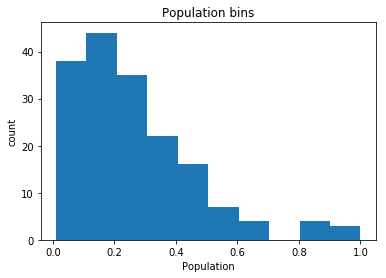

In [80]:
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot
plt.pyplot.hist(df["Population"])

# set x/y labels and plot title
plt.pyplot.xlabel("Population")
plt.pyplot.ylabel("count")
plt.pyplot.title("Population bins")

In [81]:
bins = np.linspace(min(df["Population"]), max(df["Population"]), 4)
bins

array([0.01049406, 0.34032938, 0.67016469, 1.        ])

In [82]:
group_names = ['Low', 'Medium', 'High']

#### We apply the function "cut" the determine what each value of "df['Population']" belongs to.

In [83]:
df['Population-binned'] = pd.cut(df['Population'], bins, labels=group_names, include_lowest=True )
df[['Population','Population-binned']].head(20)

,Population,Population-binned
1,0.853638,High
2,0.223209,Low
3,0.083397,Low
4,0.048123,Low
5,0.331635,Low
6,0.083953,Low
7,0.127173,Low
8,0.286193,Low
9,0.091670,Low
10,0.235159,Low


#### Lets see the number of neighbourhoods in each bin.

In [84]:
df["Population-binned"].value_counts()

Low       131
Medium     33
High        9
Name: Population-binned, dtype: int64

#### Lets plot the distribution of each bin.

Text(0.5, 1.0, 'Population bins')

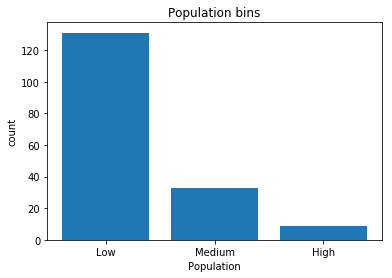

In [85]:
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot
pyplot.bar(group_names, df["Population-binned"].value_counts())
# set x/y labels and plot title
plt.pyplot.xlabel("Population")
plt.pyplot.ylabel("count")
plt.pyplot.title("Population bins")

##### Normally, a histogram is used to visualize the distribution of bins we created above.

# Descriptive Statistical Analysis

In [86]:
df.describe()

,Population,Density (people/km2),Average Income,Percentage
count,173.000000,173.000000,173.000000,173.000000
mean,0.267338,0.098214,0.157171,7.401156
std,0.197231,0.106266,0.134028,6.177067
min,0.010494,0.001474,0.062148,0.400000
25%,0.122137,0.049980,0.088588,2.800000
50%,0.218135,0.077394,0.111004,5.100000
75%,0.339717,0.118999,0.151270,10.800000
max,1.000000,1.000000,1.000000,31.400000


 # Basics of Grouping

In [87]:
df['Language'].unique()

array(['Cantonese', 'Polish', 'Russian', 'Spanish', 'Unspecified Chinese',
       'Mandarin', 'Greek', 'Tamil', 'Ukrainian', 'Portuguese', 'Tagalog',
       'Korean', 'French', 'Punjabi', 'Filipino', 'Bengali', 'Persian',
       'Italian', 'Serbian', 'Vietnamese', 'Japanese', 'Urdu', 'Hindi',
       'Somali', 'Bulgarian', 'Gujarati'], dtype=object)

In [88]:
#If we want to know, on average, which type of drive wheel is most valuable, we can group "drive-wheels" and then average them.

#We can select the columns 'drive-wheels', 'body-style' and 'price', then assign it to the variable "df_group_one".

df_group_one = df[['Language','Population']]
#We can then calculate the average price for each of the different categories of data.

# grouping results
df_group_one = df_group_one.groupby(['Language'],as_index=False).mean()
df_group_one

,Language,Population
0,Bengali,0.203702
1,Bulgarian,0.265722
2,Cantonese,0.369648
3,Filipino,0.233979
4,French,0.110666
5,Greek,0.378978
6,Gujarati,0.928897
7,Hindi,0.073171
8,Italian,0.304512
9,Japanese,0.010494


In [89]:
df.info
# It provide a concise summary of your DataFrame.

<bound method DataFrame.info of                 Neighbourhood  Population  Density (people/km2)  \
1                   Agincourt    0.853638              0.056144   
2                   Alderwood    0.223209              0.037011   
3              Alexandra Park    0.083397              0.213424   
4                     Allenby    0.048123              0.067953   
5                    Amesbury    0.331635              0.077378   
6              Armour Heights    0.083953              0.030016   
7                     Banbury    0.127173              0.038297   
8              Bathurst Manor    0.286193              0.049980   
9         Bay Street Corridor    0.091670              0.682475   
10            Bayview Village    0.235159              0.046515   
11    Bayview Woods – Steeles    0.254653              0.051235   
12               Bedford Park    0.263290              0.094989   
13                    Bendale    0.554290              0.053462   
14                Birch Cliff 

In [90]:
#To get the list of column headers we can call upon the dataframe's .columns parameter.

df.columns.values 

array(['Neighbourhood', 'Population', 'Density (people/km2)',
       'Average Income', 'Transit Commuting\xa0%', 'Percentage',
       'Language', 'Population-binned'], dtype=object)

In [91]:
#Note: The default type of index and columns is NOT list.

print(type(df.columns))
print(type(df.index))

<class 'pandas.core.indexes.base.Index'>
<class 'pandas.core.indexes.numeric.Int64Index'>


In [92]:
#To get the index and columns as lists, we can use the tolist() method.

df.columns.tolist()
df.index.tolist()

print (type(df.columns.tolist()))
print (type(df.index.tolist()))

<class 'list'>
<class 'list'>


#### Saving the Dataframe to csv file format

In [93]:
import folium # map rendering library
import json # library to handle JSON files
import numpy as np
import pandas as pd

In [96]:
export_csv = df.to_csv (r'C:\data\export_dataframe.csv', index = None, header=True)

# Visualizing Data using Matplotlib¶

In [97]:
# use the inline backend to generate the plots within the browser
%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.style.use('ggplot') # optional: for ggplot-like style

# check for latest version of Matplotlib
print ('Matplotlib version: ', mpl.__version__) # >= 2.0.0

Matplotlib version:  3.0.3


### To create a base map, simply pass your starting coordinates to Folium:

In [98]:
m = folium.Map(location=[45.5236, -122.6750])

### to save it in a file,

In [99]:
m.save('index.html')

### Folium -- Using generated GeoJSON file for Ontario FSAs

In [100]:
import folium # map rendering library
import json # library to handle JSON files
import numpy as np
import pandas as pd

In [101]:
import pandas as pd
os.chdir(c:\\data)
df = pd.read_csv ('98-401-X2016046_English_CSV_data.CSV')
print (df)

SyntaxError: invalid syntax (<ipython-input-101-2c454c11a0ac>, line 2)

In [91]:
df_pop = pd.read_csv(r'C\data\98-401-X2016046_English_CSV_data.CSV')
# we can immediately drop the columns we're not interested in 
df_pop=df_pop[['Geographic code','Province or territory', 'Population, 2016']]
df_pop=df_pop[(df_pop['Province or territory']== "Ontario")]
df_pop.head()


FileNotFoundError: [Errno 2] File b'C\\data\\98-401-X2016046_English_CSV_data.CSV' does not exist: b'C\\data\\98-401-X2016046_English_CSV_data.CSV'

### The Toronto Demographic dataframe

In [102]:
df = df.set_index("Neighbourhood")
df.info

<bound method DataFrame.info of                           Population  Density (people/km2)  Average Income  \
Neighbourhood                                                                
Agincourt                   0.853638              0.056144        0.081978   
Alderwood                   0.223209              0.037011        0.112188   
Alexandra Park              0.083397              0.213424        0.062676   
Allenby                     0.048123              0.067953        0.781874   
Amesbury                    0.331635              0.077378        0.087696   
Armour Heights              0.083953              0.030016        0.371373   
Banbury                     0.127173              0.038297        0.293909   
Bathurst Manor              0.286193              0.049980        0.108781   
Bay Street Corridor         0.091670              0.682475        0.129249   
Bayview Village             0.235159              0.046515        0.148841   
Bayview Woods – Steeles     0.25

### The Toronto Neighbourhood with the geographic coordinates

In [103]:
toronto_data=toronto_data.set_index("Neighbourhood")
toronto_data.head(10)

,Borough,Latitude,Longitude,Cluster Labels
Neighbourhood,,,,
The Beaches,East Toronto,43.676357,-79.293031,1
"Riverdale, The Danforth West",East Toronto,43.679557,-79.352188,6
"India Bazaar, The Beaches West",East Toronto,43.668999,-79.315572,1
Studio District,East Toronto,43.659526,-79.340923,1
Lawrence Park,Central Toronto,43.728020,-79.388790,9
Davisville North,Central Toronto,43.712751,-79.390197,1
North Toronto West,Central Toronto,43.715383,-79.405678,1
Davisville,Central Toronto,43.704324,-79.388790,1
"Moore Park, Summerhill East",Central Toronto,43.689574,-79.383160,1


### We need to append the Demographic data with the coordinates

In [104]:
df_cd = pd.merge(toronto_data, df, how='inner', on = 'Neighbourhood')
df_cd.head(20)

,Borough,Latitude,Longitude,Cluster Labels,Population,Density (people/km2),Average Income,Transit Commuting %,Percentage,Language,Population-binned
Neighbourhood,,,,,,,,,,,
The Beaches,East Toronto,43.676357,-79.293031,1,0.390961,0.089689,0.215010,13.8,0.7,Cantonese,Medium
Lawrence Park,Central Toronto,43.728020,-79.388790,9,0.127403,0.028668,0.681647,8.3,0.8,French,Low
Davisville,Central Toronto,43.704324,-79.388790,1,0.454366,0.118498,0.177440,26.0,1.5,Persian,Medium
Rosedale,Downtown Toronto,43.679563,-79.377529,1,0.146917,0.044241,0.681109,11.3,1.0,Unspecified Chinese,Low
Church and Wellesley,Downtown Toronto,43.665860,-79.383160,5,0.256549,0.381996,0.119873,25.1,1.8,Spanish,Low
St. James Town,Downtown Toronto,43.651494,-79.375418,1,0.280850,1.000000,0.071125,27.4,8.1,Filipino,Low


In [92]:
import fiona
shape = fiona.open("C:\\data\\shape\\NEIGHBORHOODS_WGS84.shp")
print (shape.schema)
#{'geometry': 'LineString', 'properties': OrderedDict([(u'FID', 'float:11')])}
#first feature of the shapefile
first = shape.next()
print (first) # (GeoJSON format)
#{'geometry': {'type': 'LineString', 'coordinates': [(0.0, 0.0), (25.0, 10.0), (50.0, 50.0)]}, 'type': 'Feature', 'id': '0', 'properties': OrderedDict([(u'FID', 0.0)])}

{'properties': OrderedDict([('AREA_S_CD', 'str:10'), ('AREA_NAME', 'str:200')]), 'geometry': 'Polygon'}


C:\Users\gzoub\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: FionaDeprecationWarning: Collection.__next__() is buggy and will be removed in Fiona 2.0. Switch to `next(iter(collection))`.
  


{'type': 'Feature', 'id': '0', 'properties': OrderedDict([('AREA_S_CD', '097'), ('AREA_NAME', 'Yonge-St.Clair (97)')]), 'geometry': {'type': 'Polygon', 'coordinates': [[(-79.391194827, 43.681081124), (-79.391405432, 43.680969554), (-79.393223778, 43.68016564), (-79.395808832, 43.67897994), (-79.39734939, 43.678274813), (-79.397456054, 43.678225407), (-79.397563898, 43.678167002), (-79.397671319, 43.678117597), (-79.397779545, 43.678068202), (-79.397888536, 43.678014289), (-79.397931367, 43.67799496), (-79.397944053, 43.678026295), (-79.398012159, 43.678203874), (-79.398140901, 43.678530736), (-79.39835151, 43.679039165), (-79.398562968, 43.679554271), (-79.398733166, 43.679962231), (-79.39893948, 43.680460422), (-79.399065448, 43.680766541), (-79.399215419, 43.681127631), (-79.399803535, 43.682543482), (-79.400168894, 43.683415978), (-79.400209291, 43.683526704), (-79.400530362, 43.684309799), (-79.400841057, 43.685027249), (-79.40112639, 43.685716067), (-79.401495486, 43.686640698), (

C:\Users\gzoub\Anaconda3\lib\site-packages\pysal\model\spvcm\abstracts.py:10: UserWarning: The `dill` module is required to use the sqlite backend fully.
  from .sqlite import head_to_sql, start_sql


    AREA_S_CD                                 AREA_NAME  \
0         097                       Yonge-St.Clair (97)   
1         027              York University Heights (27)   
2         038                     Lansing-Westgate (38)   
3         031                   Yorkdale-Glen Park (31)   
4         016                  Stonegate-Queensway (16)   
5         118              Tam O'Shanter-Sullivan (118)   
6         063                          The Beaches (63)   
7         003          Thistletown-Beaumond Heights (3)   
8         055                     Thorncliffe Park (55)   
9         059                   Danforth East York (59)   
10        106                  Humewood-Cedarvale (106)   
11        014           Islington-City Centre West (14)   
12        066                             Danforth (66)   
13        028                               Rustic (28)   
14        139                 Scarborough Village (139)   
15        085                       South Parkdale (85) 

139  POLYGON ((-79.46462064799999 43.692155606, -79...  


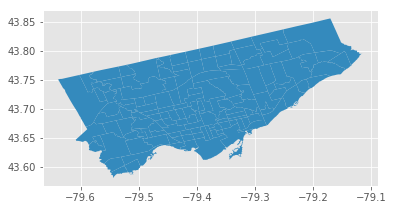

In [105]:
import geopandas as gpd
import os 
import matplotlib.cm as cm
import matplotlib.colors as colors
from descartes import PolygonPatch
import geopandas as gp
import pysal as ps
import numpy as np

from matplotlib import pyplot
from shapely.geometry import LineString
from descartes import PolygonPatch


  
# change the current working directory  
# to specified path 
os.chdir('c:\\data\\shape')

shapefile = gpd.read_file("NEIGHBORHOODS_WGS84.shp")
print(shapefile)
shapefile.plot()

### read in Canada Census population data from 2016 and filter for our columns and rows of interest (Population, 2016 for Ontario)

In [106]:
os.chdir('c:\\data')
df_pop = pd.read_csv("T1201EN.CSV")
# we can immediately drop the columns we're not interested in 
#df_pop=df_pop[['Geographic code','Province or territory', 'Population, 2016']]
df_pop=df_pop[(df_pop['Province or territory']== "Ontario")]
df_pop.head()

,Geographic code,Geographic name,Province or territory,"Incompletely enumerated Indian reserves and Indian settlements, 2016","Population, 2016","Total private dwellings, 2016","Private dwellings occupied by usual residents, 2016"
650,K0A,K0A,Ontario,NaN,103474.0,40512.0,38794.0
651,K0B,K0B,Ontario,NaN,20945.0,9395.0,8714.0
652,K0C,K0C,Ontario,NaN,52154.0,22366.0,21132.0
653,K0E,K0E,Ontario,NaN,38903.0,18248.0,16177.0
654,K0G,K0G,Ontario,NaN,37097.0,18931.0,15121.0


### Creating choropleth map for Toronto demographic data organized based on FSA (Forward Sortation Area — the first three digits of the Canadian Postal Code) utilizing Folium for creating these kind of maps requires a GeoJSON file as an input. This file is not readilly available online or from other sources, so I had to creat this file. Statistics Canada does publish some Census Boundary Files data for Canadian FSAs (available from this site: https://www12.statcan.gc.ca/census-recensement/2011/geo/bound-limit/bound-limit-2016-eng.cfm). 

### On the site I selected to save the option for downloading the data for the Forward Sortation Areas in ArcGIS shape file format. In ArcGIS software there is no direct method to convert the shape format to Geojson format. But, frotunatly we can use QGIS software which is a free software to convert the shape file to Geojson. The downloaded file contains all of the Canadian statistics for 2016 and utilizing QGIS we had to filter the data for Ontario province and for the 

In [107]:
import folium # map rendering library
import json 
import numpy as np


In [108]:
#ontario_geo = "./data/NEIGHBORHOODS_WGS84.json"import pandas as pd
os.chdir('c:\\data')
map_toronto = folium.Map(location=[43.653963, -79.387207], zoom_start=10)
ontario_geo = "Toronto.geojson"
map_toronto.choropleth(geo_data=ontario_geo,
    data = df_pop,
    columns=['Geographic code','Population, 2016'],
    key_on='feature.properties.CFSAUID',
    fill_color='YlOrRd',
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='Population by FSA')   
    
map_toronto

C:\Users\gzoub\Anaconda3\lib\site-packages\folium\folium.py:415: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  FutureWarning


### We can easily see that the highest population is in North York. From the Demographic analysis we carreid earlier North York has a population of 10,427 and its population density is 37,239. Almost 10% of the residents speak chinese language. So, it is very much favurable to open a chinese cousine resturant in North York.